<a href="https://colab.research.google.com/github/ArjunR27/Lab6TextMining/blob/main/Lab_TextMining_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Assignment: Analyzing Book Genres and Themes through Clustering

Full Credit: 20 points

You can either work independently or in a group of three. Should you choose to work in a group, you MUST mention the group member names. You can only work in groups of three ie each group should have only 3 members.

#### **Objective:**
The goal of this assignment is to utilize clustering techniques on a dataset of book descriptions to achieve the following:

1. **Discover Common Themes:**
   - Identify prevalent themes within clusters of books.
2. **Assign Genres to Authors:**
   - Group books into clusters and determine the genre for each author based on their cluster membership.

#### **Functionality Requirements:**
Your program should:
- Display the genre associated with a given author. (**10 points**)
- Identify and display the common themes of a specific author’s works. (**5 points**)
- Visualize using a Word cloud (**5 points**)
---

#### **Dataset:**
Use the `cleaned_books.csv` dataset that can be downloaded that includes book descriptions and author details.

---

#### **Tasks:**

1. **Data Preprocessing:**
   - Load the dataset into a Pandas DataFrame.
   - Clean the book descriptions by removing stop words and performing additional necessary preprocessing steps.

2. **Clustering:**
   - Generate TF-IDF vectors from the book descriptions using `TfidfVectorizer`.
   - Identify the optimal number of clusters (`k`) using a suitable method (e.g., the Elbow Method).
   - Choose a clustering algorithm (e.g., K-Means, DBSCAN) and justify your choice.
   - Perform clustering to group books into clusters and assign a cluster label to each book in the DataFrame.

3. **Genre Assignment:**
   - Group books by author and cluster labels.
   - Assign the most frequent cluster associated with each author as their genre.
   - Create a data structure (e.g., a Pandas Series) to store the mapping of authors to their assigned genres.

4. **Theme Identification:**
   - Develop a function to extract the main themes of a cluster using the top `N` terms from the TF-IDF matrix.
   - Apply this function to all clusters to identify and interpret the predominant themes.
   - Visualize using a Word cloud



---
```
Use CAses: (the below use case is with K Means clustering. You can get different cluster number and different words under themes depending on your implementation. Moreover, you can apply DBScan as well.)

Enter an author name: Stephen King
The genre of Stephen King is: Cluster 1

Common themes for Stephen King: 'concis' 'hemingway' 'autobiograph' ... 'power' 'one' 'world'

```

Use the following helper code to download the dataset

In [1]:
import io
import requests
import zipfile
import pandas as pd

# Download the zip file from the raw URL
url = "https://github.com/sumonacalpoly/Datasets/raw/main/cleaned_books.csv.zip"
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad responses

# Extract the CSV data from the zip file
with zipfile.ZipFile(io.BytesIO(response.content)) as zf:
    with zf.open('cleaned_books.csv') as f:
        cleaned_books = pd.read_csv(f)


In [2]:

df = cleaned_books.copy()

In [3]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 6.7 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
stop_words = set(stopwords.words('english'))
def clean_text(text):
  text = text.lower()
  tokens = word_tokenize(text)
  cleaned_tokens = [word for word in tokens if word not in stop_words]
  cleaned_text = " ".join(cleaned_tokens)
  return cleaned_text

df['cleaned_description'] = df['description'].apply(clean_text)
df.head()

,title,author,description,cleaned_description
0,The Hunger Games,Suzanne Collins,winning will make you famous. losing means cer...,winning make famous . losing means certain dea...
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,there is a door at the end of a silent corrido...,door end silent corridor . ’ haunting harry po...
2,To Kill a Mockingbird,Harper Lee,the unforgettable novel of a childhood in a sl...,unforgettable novel childhood sleepy southern ...
3,Twilight,Stephenie Meyer,about three things i was absolutely positive.f...,"three things absolutely positive.first , edwar..."
4,The Book Thief,Markus Zusak,trying to make sense of the horrors of world w...,"trying make sense horrors world war ii , death..."


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['cleaned_description'])

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf.get_feature_names_out()
)

tfidf_df.head()

,00,000,00007461,0001,0006499481,000th,000this,001,002,003i,...,ﬁction,ﬁerce,ﬁnd,ﬁred,ﬁrst,ﬂame,ﬂavorful,ﬂavors,ﬂed,ﬂoors
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


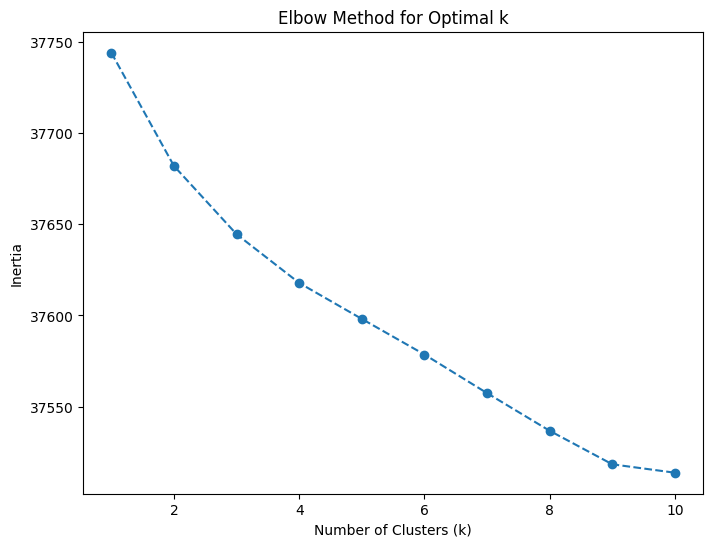

In [23]:
from sklearn.cluster import KMeans
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_distances


distance_matrix = cosine_distances(tfidf_matrix)
print(distance_matrix)


[[0.         0.99375236 0.98390317 ... 0.98225824 0.9870882  0.99367309]
 [0.99375236 0.         1.         ... 0.99151501 0.98744779 1.        ]
 [0.98390317 1.         0.         ... 0.99872729 0.96191311 0.97818183]
 ...
 [0.98225824 0.99151501 0.99872729 ... 0.         0.9851782  0.98909593]
 [0.9870882  0.98744779 0.96191311 ... 0.9851782  0.         0.98215109]
 [0.99367309 1.         0.97818183 ... 0.98909593 0.98215109 0.        ]]


In [24]:
# KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(tfidf_matrix)

cluster_labels = kmeans.fit_predict(distance_matrix)
df['cluster'] = cluster_labels

In [45]:
"""
Genre Assignment:

Group books by author and cluster labels.
Assign the most frequent cluster associated with each author as their genre.
Create a data structure (e.g., a Pandas Series) to store the mapping of authors to their assigned genres.
"""

# Creates a mapping of author and the most frequent cluster (mode) in which they appear
author_cluster = df.groupby('author')['cluster'].apply(lambda x: x.mode().iloc[0])

[0 1 2 3]




DBSCAN seems to be the better choice for this problem because we are unsure of the number of clusters and it appears to be computationally expensive to run the elbow method going up to large numbers of k. Additionally, DBSCAN is more versatile since it can create non-spherical clusters if this dataset requires that.

In [52]:
"""
Theme Identification:

Develop a function to extract the main themes of a cluster using the top N terms from the TF-IDF matrix.
Apply this function to all clusters to identify and interpret the predominant themes.
Visualize using a Word cloud
"""

def extract_themes(tfidf_matrix, tfidf_vectorizer, cluster_labels, top_n_words=5):
  feature_names = tfidf_vectorizer.get_feature_names_out()

  cluster_themes = {}

  for cluster in range(4):
    cluster_docs = tfidf_matrix[cluster_labels == cluster]

    word_tfidf_sums = cluster_docs.sum(axis=0).A1

    word_indices = np.arange(len(word_tfidf_sums))
    sorted_indices = word_indices[np.argsort(word_tfidf_sums)]
    top_word_indices = sorted_indices[-top_n_words:][::-1]

    top_words = [feature_names[i] for i in top_word_indices]
    top_weights = word_tfidf_sums[top_word_indices]

    theme_dict = dict(zip(top_words, top_weights))
    cluster_themes[cluster] = theme_dict

  return cluster_themes

cluster_themes = extract_themes(tfidf_matrix=tfidf_matrix, tfidf_vectorizer=tfidf, cluster_labels=cluster_labels)
print(cluster_themes)


{0: {'life': 252.4257076175735, 'love': 231.28116332333778, 'one': 215.52089900459092, 'new': 158.4104440896655, 'world': 143.4616833436526}, 1: {'book': 106.74194589121106, 'world': 90.98296031599104, 'one': 90.15515940492625, 'new': 85.55337760710233, 'life': 82.19486941399128}, 2: {'one': 223.3434665686649, 'life': 198.87710173306155, 'new': 168.27137116258834, 'world': 158.25552501083473, 'love': 146.21940261040854}, 3: {'book': 212.2184160635295, 'story': 158.0363979450229, 'world': 151.96419017159937, 'new': 147.37776489206806, 'life': 137.7661834308912}}


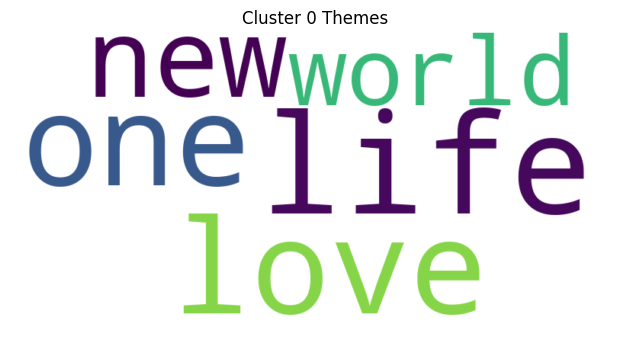

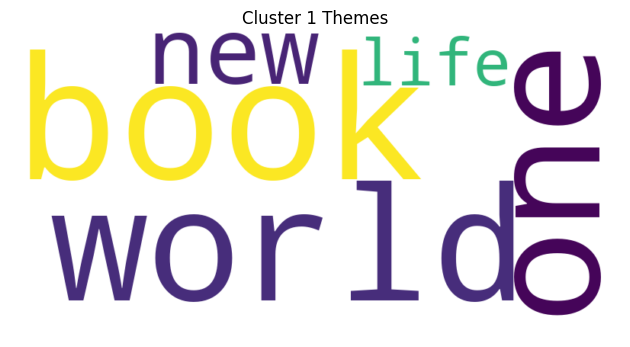

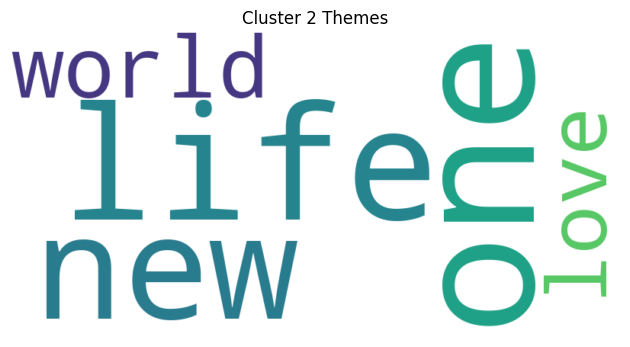

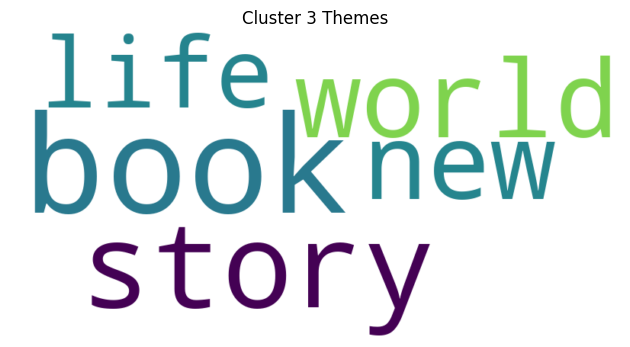

In [67]:
def wordcloud(cluster_themes):
  # 4 different word clouds
  for i in range(len(cluster_themes.keys())):
    wc = WordCloud(width=800, height=400, background_color='white', min_font_size=10).generate_from_frequencies(cluster_themes[i])
    plt.title(f'Cluster {i} Themes')
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.show()


wordcloud(cluster_themes=cluster_themes)